In [2]:
symb = 'pypl'

In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt 
import yfinance as yf
import pandas_datareader as pdr
import numpy as np
%matplotlib inline

In [4]:
def options_chain(symbol):
    tk = yf.Ticker(symbol)
    stock = tk.history().iloc[-1]["Close"]
    # Expiration dates
    exps = tk.options

    # Get options for each expiration
    options = pd.DataFrame()
    for e in exps:
        opt = tk.option_chain(e)
        opt = pd.DataFrame().append(opt.calls).append(opt.puts)
        opt['expirationDate'] = e
        options = options.append(opt, ignore_index=True)
    # Boolean column if the option is a CALL
    options['type'] = options['contractSymbol'].str[4:].apply(lambda x: "Call" if 'C' in x else 'Put')
    
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mid'] = (options['bid'] + options['ask']) / 2 # Calculate the midpoint of the bid-ask
    options['lastTradeDate'] = options['lastTradeDate'].dt.date
    options['change'] = options.change.round(2)
    options['percentChange']=options.percentChange.round(2)
    options['expiry']=options['expirationDate'].astype('datetime64[ns]')
    options['cash'] = abs((stock - options['strike'])* options['volume'])
    options['vol/oi'] = options['volume']/options['openInterest']


    # Drop unnecessary and meaningless columns
    #options = options.drop(columns = ['contractSize', 'currency','expirationDate'])
    
    return options    

In [5]:
# get data
data = options_chain(symb).fillna(0)
data['gatherDate'] = dt.date.today()
# get last quote
stock = yf.Ticker(symb).history().iloc[-1]["Close"]
# Get option Dates
tck = yf.Ticker(symb).options

KeyboardInterrupt: 

In [ ]:
data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,inTheMoney,contractSize,currency,expirationDate,type,mid,expiry,cash,vol/oi,gatherDate
0,ABNB211223C00100000,2021-12-15,100.0,65.80,71.10,71.75,0.00,0.00,0.0,1,...,True,REGULAR,USD,2021-12-23,Call,71.425,2021-12-23,0.000000,0.000000,2021-12-23
1,ABNB211223C00120000,2021-12-20,120.0,50.78,50.95,51.75,14.48,39.89,4.0,4,...,True,REGULAR,USD,2021-12-23,Call,51.350,2021-12-23,205.719971,1.000000,2021-12-23
2,ABNB211223C00125000,2021-12-14,125.0,41.05,46.15,46.75,0.00,0.00,1.0,1,...,True,REGULAR,USD,2021-12-23,Call,46.450,2021-12-23,46.429993,1.000000,2021-12-23
3,ABNB211223C00130000,2021-12-21,130.0,34.85,41.10,41.95,0.00,0.00,4.0,3,...,True,REGULAR,USD,2021-12-23,Call,41.525,2021-12-23,165.719971,1.333333,2021-12-23
4,ABNB211223C00135000,2021-12-23,135.0,34.83,36.10,36.70,6.28,22.00,1.0,11,...,True,REGULAR,USD,2021-12-23,Call,36.400,2021-12-23,36.429993,0.090909,2021-12-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,ABNB240119P00230000,2021-12-02,230.0,90.71,79.75,85.40,0.00,0.00,1.0,2,...,True,REGULAR,USD,2024-01-19,Put,82.575,2024-01-19,58.570007,0.500000,2021-12-23
858,ABNB240119P00240000,2021-12-02,240.0,98.54,88.40,93.90,0.00,0.00,0.0,1,...,True,REGULAR,USD,2024-01-19,Put,91.150,2024-01-19,0.000000,0.000000,2021-12-23
859,ABNB240119P00250000,2021-11-15,250.0,79.50,98.90,104.60,0.00,0.00,0.0,1,...,True,REGULAR,USD,2024-01-19,Put,101.750,2024-01-19,0.000000,0.000000,2021-12-23
860,ABNB240119P00260000,2021-12-15,260.0,108.00,101.00,110.00,0.00,0.00,1.0,7,...,True,REGULAR,USD,2024-01-19,Put,105.500,2024-01-19,88.570007,0.142857,2021-12-23


In [ ]:
df = data
df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,inTheMoney,contractSize,currency,expirationDate,type,mid,expiry,cash,vol/oi,gatherDate
0,ABNB211223C00100000,2021-12-15,100.0,65.80,71.10,71.75,0.00,0.00,0.0,1,...,True,REGULAR,USD,2021-12-23,Call,71.425,2021-12-23,0.000000,0.000000,2021-12-23
1,ABNB211223C00120000,2021-12-20,120.0,50.78,50.95,51.75,14.48,39.89,4.0,4,...,True,REGULAR,USD,2021-12-23,Call,51.350,2021-12-23,205.719971,1.000000,2021-12-23
2,ABNB211223C00125000,2021-12-14,125.0,41.05,46.15,46.75,0.00,0.00,1.0,1,...,True,REGULAR,USD,2021-12-23,Call,46.450,2021-12-23,46.429993,1.000000,2021-12-23
3,ABNB211223C00130000,2021-12-21,130.0,34.85,41.10,41.95,0.00,0.00,4.0,3,...,True,REGULAR,USD,2021-12-23,Call,41.525,2021-12-23,165.719971,1.333333,2021-12-23
4,ABNB211223C00135000,2021-12-23,135.0,34.83,36.10,36.70,6.28,22.00,1.0,11,...,True,REGULAR,USD,2021-12-23,Call,36.400,2021-12-23,36.429993,0.090909,2021-12-23


# Visualize the Implied Volaitlity of all contracts. 

<AxesSubplot:xlabel='strike', ylabel='impliedVolatility'>

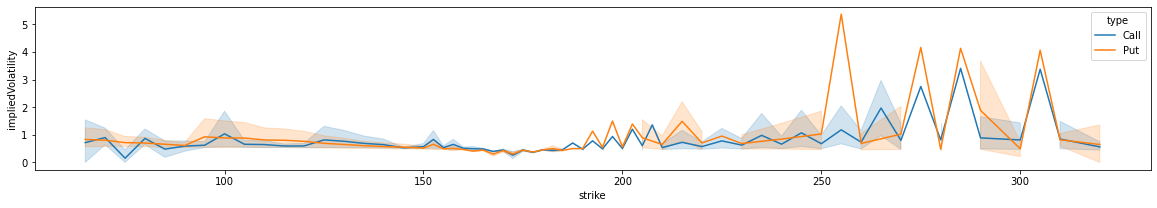

In [ ]:
plt.figure(figsize=(20,3))
# Plot the strike, and volume for specified date. 
# add together calls and puts for each strike 
sns.lineplot(data=df,x='strike',y='impliedVolatility',hue='type')
#sns.lineplot(data=df,x='strike', y='impliedVolatility',hue='type')

# Start with looking at Implied Volatility

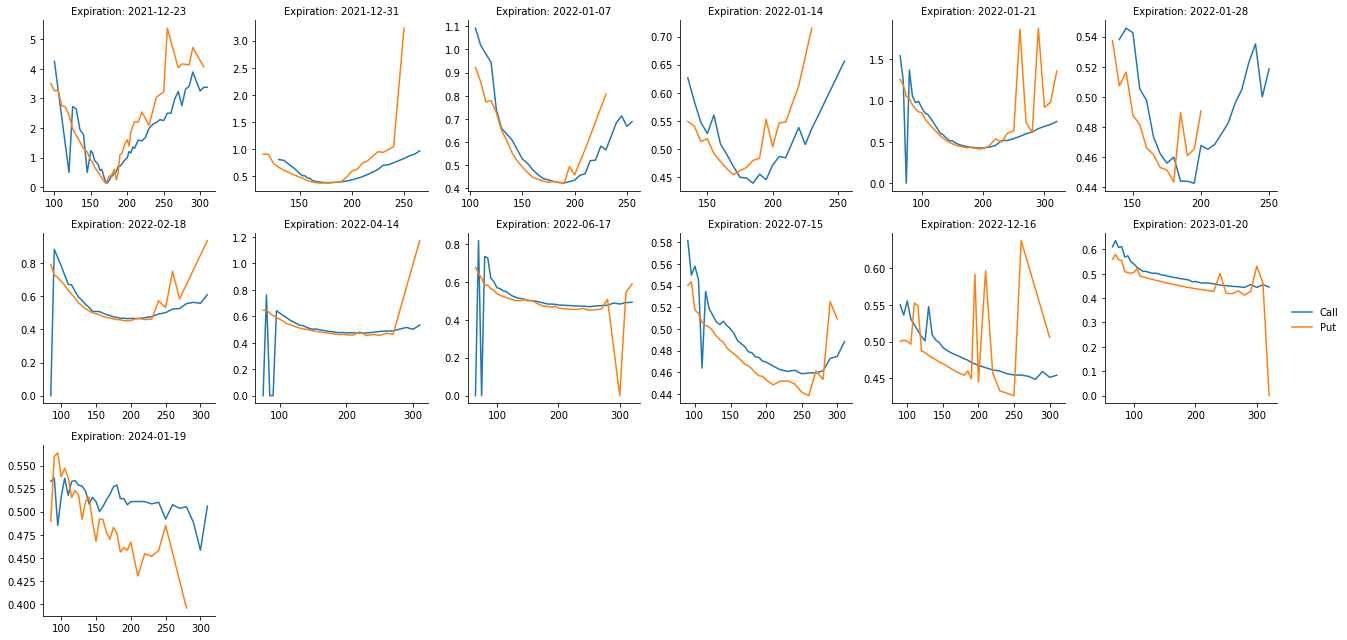

In [ ]:
# Set up grid to plot each expiration date on a different plot
g= sns.FacetGrid(df, col='expiry',col_wrap=6,sharex=False,sharey=False)
g.map_dataframe(sns.lineplot, x='strike',y='impliedVolatility',hue='type')
g.add_legend()
#Set the titles of each plot 
g.col_names = tck
g.set_titles(col_template = 'Expiration: {col_name}')

# Trading volume for each expiration date today 

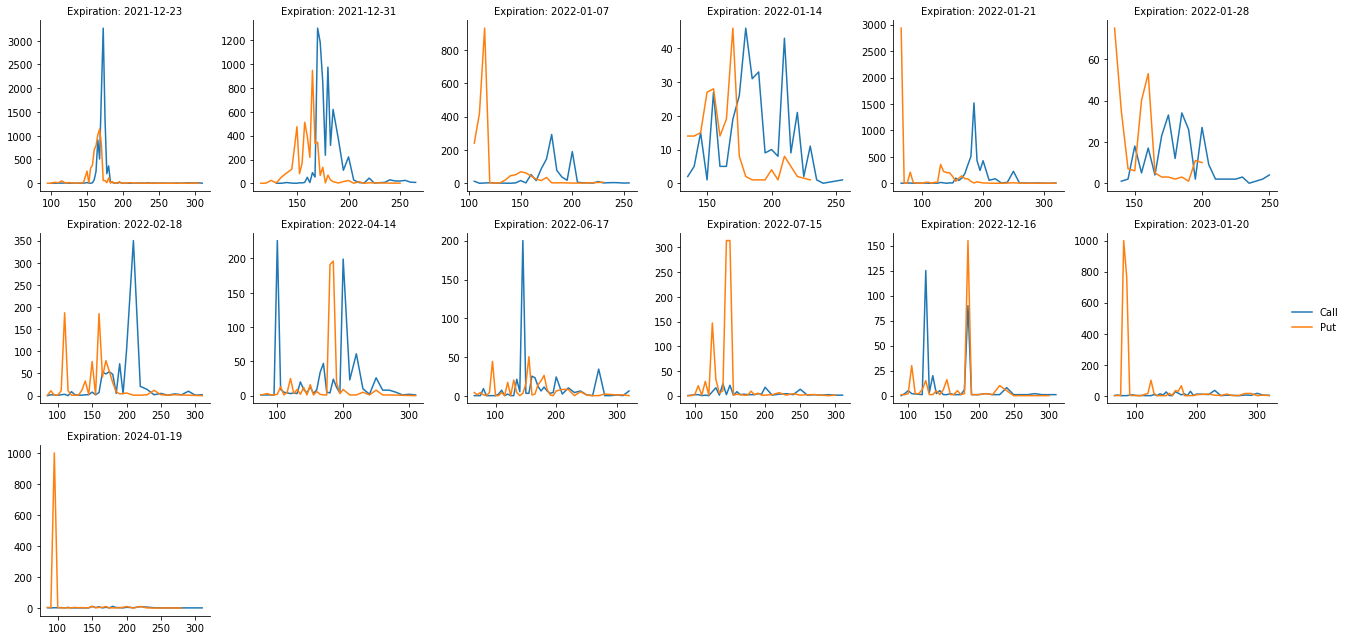

In [ ]:
# Set up grid to plot each expiration date on a different plot
g= sns.FacetGrid(data, col='expiry',col_wrap=6,sharex=False,sharey=False)
g.map_dataframe(sns.lineplot, x='strike',y='volume',hue='type')
g.add_legend()
#Set the titles of each plot 
g.col_names = tck
g.set_titles(col_template = 'Expiration: {col_name}')


# Open Interest for contracts today 

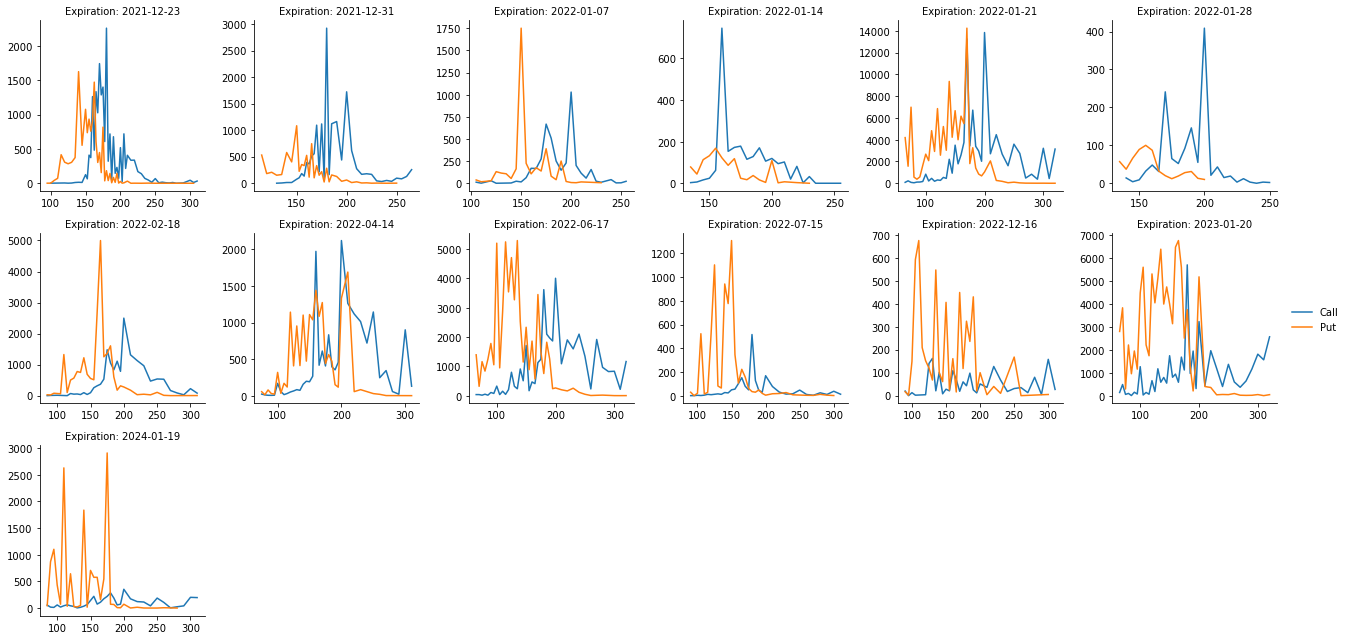

In [ ]:
# Set up grid to plot each expiration date on a different plot
g= sns.FacetGrid(data, col='expiry',col_wrap=6,sharex=False,sharey=False)
g.map_dataframe(sns.lineplot, x='strike',y='openInterest',hue='type')
g.add_legend()
#Set the titles of each plot 
g.col_names = tck
g.set_titles(col_template = 'Expiration: {col_name}')

# The ask for contracts today 

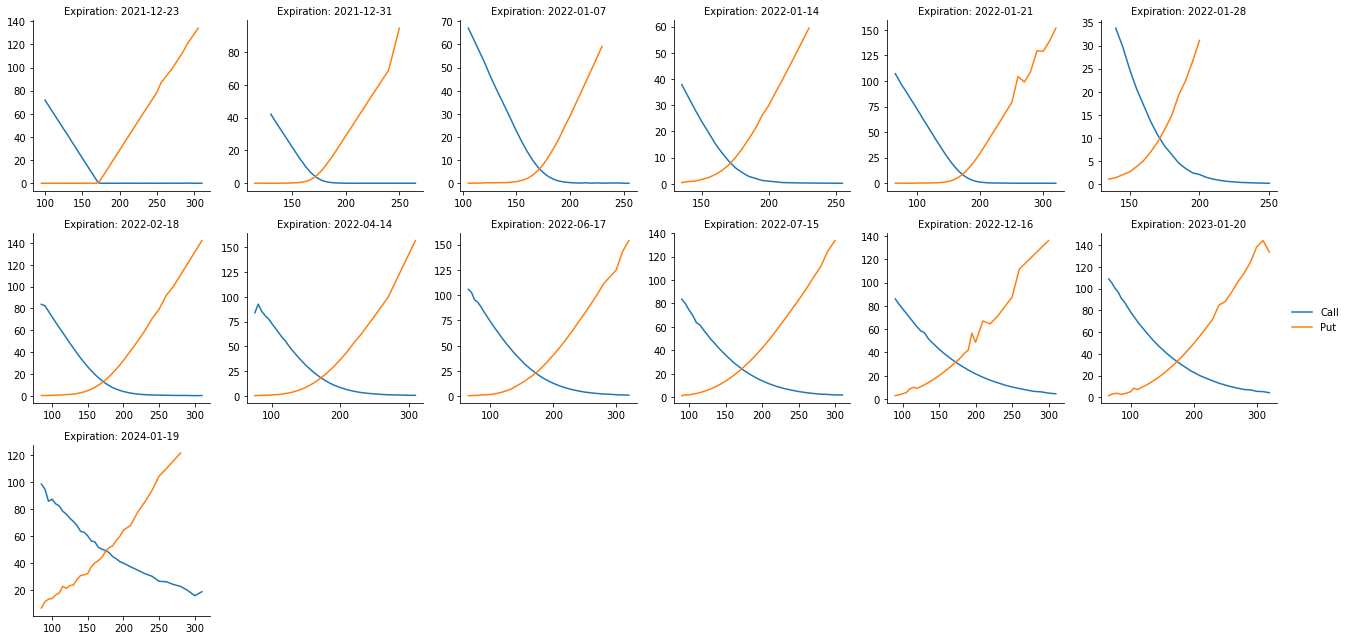

In [ ]:
# Set up grid to plot each expiration date on a different plot
g= sns.FacetGrid(data, col='expiry',col_wrap=6,sharex=False,sharey=False)
g.map_dataframe(sns.lineplot, x='strike',y='ask',hue='type')
g.add_legend()
#Set the titles of each plot 
g.col_names = tck
g.set_titles(col_template = 'Expiration: {col_name}')

# Unusual Options Activity 

# Open interest and Trading Volume 
- Volume is the total amount of contracts traded for the given day.  
- Open Interest is the amount of contracts that are currently open.  
- Open interest includes all buyers and sellers of a contract, while volume includes all the contracts traded for the day  (buys and sells.)
## When open interest does not exceed trading volume it is an indication that trading in that contract was high for the particular day
- Usually this is expressed as Volume divided by Open interest, a high value indicates unusual options activity. 

In [ ]:
call = data.groupby(['type'])['volume'].sum()['Call']
put = data.groupby(['type'])['volume'].sum()['Put']
total = call+put
print('Contracts for {} today'.format(symb))
print('calls: {} %, \n puts: {} %'.format((call/total*100).round(2),(100* put/total).round(2)))
print('Last Price: {}'.format(stock))

Contracts for abnb today
calls: 51.1 %, 
 puts: 48.9 %
Last Price: 171.3800048828125


In [ ]:
# get the average price and average volume for each contract. 
def ticker_dict(df):
    ticker= df['contractSymbol']
    infoDict = {}
    for i in ticker: 
        infoDict[i] ={}
        tickerdf = yf.Ticker(i).history('3mo')
        infoDict[i]['price'] = tickerdf['Close'][-1]
        infoDict[i]['ma'] = pd.Series(tickerdf['Close'].rolling(200, min_periods=0).mean())[-1]
        infoDict[i]['avgVol'] = pd.Series(tickerdf['Volume'].rolling(200, min_periods=0).mean())[-1].round()
    tdf = pd.DataFrame(infoDict).transpose()
    return df.merge(tdf,'inner', left_on='contractSymbol', right_index=True)

In [ ]:
#show.sort_values('volume',ascending=False)

In [ ]:
def saveFile(symb, data):
    # Save the data to csv in their own folder with a date time stammp 
    import os
    import datetime as dt
    outname = f'OptionChain_{symb}__{dt.date.today()}.csv'
    uopt = f'UnusualOptions_{symb}_{dt.date.today()}.csv'
    outdir = f'data/{symb}'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    fullname = os.path.join(outdir, outname)
    partname = os.path.join(outdir, uopt)  
    data.to_csv(fullname)
    #show.to_csv(partname)
saveFile(symb,df)


In [ ]:
from glob import glob
import os
outdir = f'OptionData/{symb}'
if not os.path.exists(outdir):
    os.mkdir(outdir)

# get the previous file paths for specified stock
fname = glob("OptionData/{}/*".format(symb))
if len(fname) != 0:
    UnusualOptions_prev = pd.read_csv(fname[0], index_col=None)
    OptionChain_prev = pd.read_csv(fname[1], index_col=None)
    newDF = pd.concat([df,OptionChain_prev], axis=0)
    #newUdf = pd.concat([show, UnusualOptions_prev], axis=0)
else: 
    newDF = df
    #newUdf = show

if len(newDF[newDF.gatherDate == str(dt.date.today())]) > 0:
    pass
#elif len(newUdf[newUdf.gatherDate == str(dt.date.today())]) == 0:
    #newUdf.to_csv(f'OptionData/{symb}/UnusualOptions.csv')
    newDF.to_csv(f'OptionData/{symb}/OptionChain.csv')

In [ ]:
print()
print(f'{symb} Option Chains: ')
print(f'New data: \n{newDF.gatherDate.value_counts()}')
print() 
print(f'{symb} Unusual Option Activity: ')
#print(f'New data: \n{newUdf.gatherDate.value_counts()}')
print() 
print('')
print('Contracts for {} today'.format(symb))
print('calls: {} %, \n puts: {} %'.format((call/total*100).round(2),(100* put/total).round(2)))
print('Last Price: {}'.format(stock))
print('')


abnb Option Chains: 
New data: 
2021-12-23    862
Name: gatherDate, dtype: int64

abnb Unusual Option Activity: 


Contracts for abnb today
calls: 51.1 %, 
 puts: 48.9 %
Last Price: 171.3800048828125

